In [115]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from math import ceil
from math import floor
from tqdm import tqdm
from scipy import stats
from IPython.display import Image

In [3]:
def get_plane_waves(b1, b2, b3, ecut):
    #find the integral linear combinations of recip. lattice vecs with
    #electron free particle energy less than ecut


    max_val = ceil(np.sqrt(ecut)/(np.linalg.norm(b1)/np.sqrt(2)))
    plane_waves = []
    num_plane_waves = 0

    for i in range(-max_val, max_val + 1):
        for j in range(-max_val, max_val + 1):
            for k in range(-max_val, max_val + 1):
                if ((1/2)*np.linalg.norm(i * b1 + j * b2 + k * b3)**2 < ecut):
                    num_plane_waves += 1
                    plane_waves.append(i*b1+j*b2+k*b3)
    return np.array(plane_waves), num_plane_waves


## Problem 1 Part 1

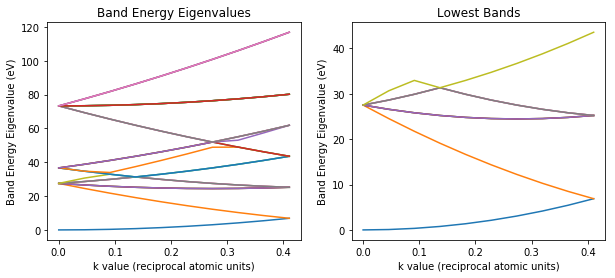

In [99]:
h_bar = 1
m = 1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms


ecut = 3 #plane wave cutoff energy (Hartrees)
fcc_conventional_cell_lattice_constant = 7.65 # (Bohr)
num_kvecs = 10 #number of points to compute bands


#Define lattice vectors
a1 = np.array([0.5, 0.5, 0]) * fcc_conventional_cell_lattice_constant
a2 = np.array([0, 0.5, 0.5]) * fcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0, 0.5]) * fcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol

plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)

#define k-points where bands will be computed
#from gamma to L for fcc crystal
k_vecs = []
for i in range(num_kvecs):
    k_vecs.append(i/(num_kvecs-1)/2 * b1 + i/(num_kvecs-1)/2 * b2 + i/(num_kvecs-1)/2 * b3)
k_vecs = np.array(k_vecs)


#form the potential part of the Hamiltonian
H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
#H_pot = hydrogen_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #hydrogen atom case

#loop over k vecs along gamma to L
eigval_array = []
for k_vec in k_vecs:
    #form the kinetic part of the Hamiltonian here
    H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
    H = H_kin + H_pot
    #compute the eigenvalues here
    eigval_array.append(np.sort(np.linalg.eigvals(H)))
    #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
eigval_array = 27.2* np.array(eigval_array)
fig,ax = plt.subplots(ncols = 2, figsize = (10,4))
ax1,ax2 = ax.flatten()
ax1.plot(k_vecs[:,0], eigval_array)
ax1.set_xlabel("k value (reciprocal atomic units)")
ax1.set_ylabel("Band Energy Eigenvalue (eV)")
ax1.set_title("Band Energy Eigenvalues")
ax2.plot(k_vecs[:,0], eigval_array[:, 0:9])
ax2.set_xlabel("k value (reciprocal atomic units)")
ax2.set_ylabel("Band Energy Eigenvalue (eV)")
ax2.set_title("Lowest Bands")
fig.savefig("hw5_1.pdf")


<img src="aluminum_band_structure.jpg" alt="Aluminum Band Structure">

Above we see the bands for aluminum, and comparing our lowest bands above to those connecting the $\Gamma$ to L points for Al, we see decent agreement amongst the general structure of the bands above the 1s orbital. They are on the same order of magnitude energy-wise but the p bands are more steep in slope. These general similarities between Al and the free electron model simulated above are enough for us to conclude that Aluminum is quite electrically conductive in that the bands resemble those where electrons can move freely.

## Problem 1 Part 2

(65, 3)


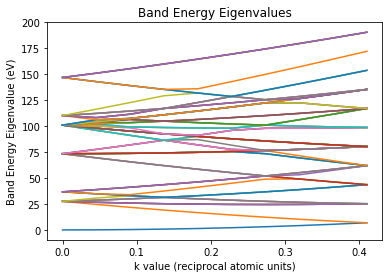

In [100]:
h_bar = 1
m = 1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms

ecut = 6 #plane wave cutoff energy (Hartrees)
fcc_conventional_cell_lattice_constant = 7.65 # (Bohr)
num_kvecs = 10 #number of points to compute bands

#Define lattice vectors
a1 = np.array([0.5, 0.5, 0]) * fcc_conventional_cell_lattice_constant
a2 = np.array([0, 0.5, 0.5]) * fcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0, 0.5]) * fcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol

plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)

#define k-points where bands will be computed
#from gamma to L for fcc crystal
k_vecs = []
for i in range(num_kvecs):
    k_vecs.append(i/(num_kvecs-1)/2 * b1 + i/(num_kvecs-1)/2 * b2 + i/(num_kvecs-1)/2 * b3)
k_vecs = np.array(k_vecs)


#form the potential part of the Hamiltonian
H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
#H_pot = hydrogen_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #hydrogen atom case

#loop over k vecs along gamma to L
eigval_array = []
for k_vec in k_vecs:
    #form the kinetic part of the Hamiltonian here
    H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
    H = H_kin + H_pot
    #compute the eigenvalues here
    eigval_array.append(np.sort(np.linalg.eigvals(H)))
    #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
print(np.shape(plane_waves)) #65 plane waves now. Energy went up.
eigval_array = 27.2*np.array(eigval_array)
fig,ax = plt.subplots()
ax.plot(k_vecs[:,0], eigval_array)
ax.set_xlabel("k value (reciprocal atomic units)")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.set_title("Band Energy Eigenvalues")
fig.savefig("hw5_1_2.pdf")

With this higher cutoff we now see 65 plane waves in the calculation now. 

We see a plot of the bands above. We note that the lowest bands don't change but now we have higher energy bands that were orignally cutoff past 3.0 Hartrees. Now that we up the cutoff to 6, we gain access to these states. 

## Problem 1 Part 3

(1411, 3)


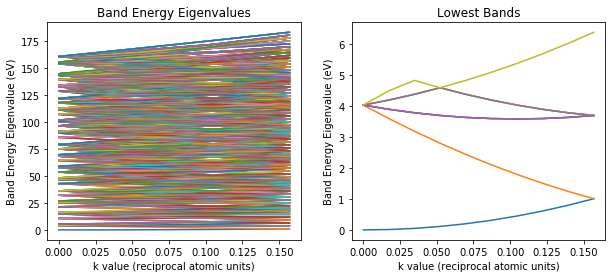

In [103]:
h_bar = 1
m = 1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms

ecut = 6 #plane wave cutoff energy (Hartrees)
fcc_conventional_cell_lattice_constant = 20 # (Bohr)
num_kvecs = 10 #number of points to compute bands

#Define lattice vectors
a1 = np.array([0.5, 0.5, 0]) * fcc_conventional_cell_lattice_constant
a2 = np.array([0, 0.5, 0.5]) * fcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0, 0.5]) * fcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol

plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)

#define k-points where bands will be computed
#from gamma to L for fcc crystal
k_vecs = []
for i in range(num_kvecs):
    k_vecs.append(i/(num_kvecs-1)/2 * b1 + i/(num_kvecs-1)/2 * b2 + i/(num_kvecs-1)/2 * b3)
k_vecs = np.array(k_vecs)


#form the potential part of the Hamiltonian
H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
#H_pot = hydrogen_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #hydrogen atom case

#loop over k vecs along gamma to L
eigval_array = []
for k_vec in k_vecs:
    #form the kinetic part of the Hamiltonian here
    H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
    H = H_kin + H_pot
    #compute the eigenvalues here
    eigval_array.append(np.sort(np.linalg.eigvals(H)))
    #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
print(np.shape(plane_waves)) 
eigval_array = 27.2* np.array(eigval_array)
fig,ax = plt.subplots(ncols = 2, figsize = (10,4))
ax1, ax2 = ax.flatten()
ax1.plot(k_vecs[:,0], eigval_array)
ax1.set_xlabel("k value (reciprocal atomic units)")
ax1.set_ylabel("Band Energy Eigenvalue (eV)")
ax1.set_title("Band Energy Eigenvalues")
ax1, ax2 = ax.flatten()
ax2.plot(k_vecs[:,0], eigval_array[:, 0:9])
ax2.set_xlabel("k value (reciprocal atomic units)")
ax2.set_ylabel("Band Energy Eigenvalue (eV)")
ax2.set_title("Lowest Bands")
fig.savefig("hw5_1_3.pdf")

Now our number of plane waves has increased tremendously up to 1411. Now we have our lowest energy bands in terms of a few eV as opposed to tens of eV as before. The general structure of the bands is the same as before, but the absolute energy of them has decreased due to the fact that as we increase the size of the computational cell we gain access to longer wavelength (lower energy) states. The lowest energy states corresponding to the longest wavelength states go in proportion to the size of the cell to obey the current boundary conditions.

## Problem 1 Part 4
 The code runs slightly slower with the larger cutoff since we have to calculate num_plane_waves eigenvalues, and num_plane_waves goes up with cutoff. As noted in the problem statement, the scaling of these calculations is $N^3$. In the second part we didn't see much more time since the number of eigenvalues just went up a factor of ten from 27 (~20k time units) to 65 (~270k time units) but in part 3 we saw significant slowdowns as we now had to calculate 1411 eigenvalues ( ~2.8 billion time units). 

## Problem 1 Part 5

In [13]:
def hydrogen_atom_pot(plane_waves, num_plane_waves, b1, b2, b3, vol):
    factor = -4*3.14*e**2/vol
    H_pot = np.zeros((num_plane_waves, num_plane_waves))
    for i in range(num_plane_waves):
        for j in range(i, num_plane_waves):
            if i == j : continue
            H_pot[i,j] = 1/(np.linalg.norm(plane_waves[i] - plane_waves[j]))**2
            H_pot[j,i] = np.copy(H_pot[i,j])
    return factor*H_pot

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


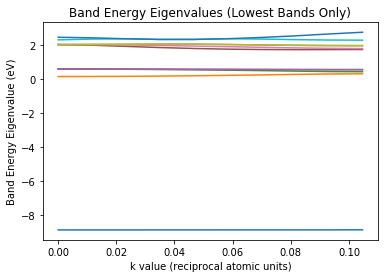

In [104]:
h_bar = 1
m = 1
e = 1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms

ecut = 6 #plane wave cutoff energy (Hartrees)
fcc_conventional_cell_lattice_constant = 30 # (Bohr)
num_kvecs = 10 #number of points to compute bands

#Define lattice vectors
a1 = np.array([0.5, 0.5, 0]) * fcc_conventional_cell_lattice_constant
a2 = np.array([0, 0.5, 0.5]) * fcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0, 0.5]) * fcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol

plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)

#define k-points where bands will be computed
#from gamma to L for fcc crystal
k_vecs = []
for i in range(num_kvecs):
    k_vecs.append(i/(num_kvecs-1)/2 * b1 + i/(num_kvecs-1)/2 * b2 + i/(num_kvecs-1)/2 * b3)
k_vecs = np.array(k_vecs)

#form the potential part of the Hamiltonian
#H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
H_pot = hydrogen_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #hydrogen atom case

#loop over k vecs along gamma to L
eigval_array = []
for k_vec in k_vecs:
    #form the kinetic part of the Hamiltonian here
    H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
    H = H_kin + H_pot
    #compute the eigenvalues here
    eigval_array.append(np.sort(np.linalg.eigvals(H)))
    #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
eigval_array = 27.2* np.array(eigval_array) #eV
fig,ax = plt.subplots()
eig_cut = 10
ax.plot(k_vecs[:,0], eigval_array[:,0:eig_cut + 1])
ax.set_xlabel("k value (reciprocal atomic units)")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.set_title("Band Energy Eigenvalues (Lowest Bands Only)")
fig.savefig("hw5_1_5.pdf")

We can clearly see from the plot above that the bands are quite flat compared to the band plots above as desired with weak interatomic interactions. 

In [119]:
h_bar = 1
m = 1
e = 1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms

ecut = 6 #plane wave cutoff energy (Hartrees)
fcc_conventional_cell_lattice_constant = 30 # (Bohr)
num_kvecs = 10 #number of points to compute bands

#Define lattice vectors
a1 = np.array([0.5, 0.5, 0]) * fcc_conventional_cell_lattice_constant
a2 = np.array([0, 0.5, 0.5]) * fcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0, 0.5]) * fcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol

plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)

#define k-points where bands will be computed
#from gamma to L for fcc crystal
k_vecs = []
for i in range(num_kvecs):
    k_vecs.append(i/(num_kvecs-1)/2 * b1 + i/(num_kvecs-1)/2 * b2 + i/(num_kvecs-1)/2 * b3)
k_vecs = np.array(k_vecs)

#form the potential part of the Hamiltonian
#H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
H_pot = hydrogen_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #hydrogen atom case

#loop over k vecs along gamma to L
eigval_array = []
for k_vec in k_vecs:
    #form the kinetic part of the Hamiltonian here
    H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
    H = H_kin + H_pot
    #compute the eigenvalues here
    eigval_array.append(np.sort(np.linalg.eigvals(H)))
    #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
eigval_array = 27.2* np.array(eigval_array) #eV



/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


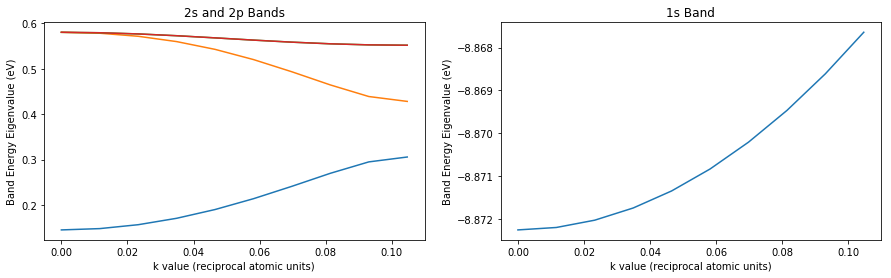

In [125]:
fig,ax = plt.subplots(ncols = 2, figsize = (15,4))
#plt.subplots_adjust(bottom = 1)
eig_cut = 5
ax1, ax2 = ax.flatten()
ax1.plot(k_vecs[:,0], eigval_array[:,1:eig_cut])
ax1.set_xlabel("k value (reciprocal atomic units)")
ax1.set_ylabel("Band Energy Eigenvalue (eV)")
ax1.set_title("2s and 2p Bands")
ax2.plot(k_vecs[:,0], eigval_array[:,0])
ax2.set_xlabel("k value (reciprocal atomic units)")
ax2.set_ylabel("Band Energy Eigenvalue (eV)")
ax2.set_title("1s Band")
fig.savefig("hw5_1_5_2.pdf")

We note the expected degeneracy between the 2s and the lowest 2p band. In reality they are separated by the Lamb shift but we aren't incorporating the quantum effects interacting the electrons with the vacuum in these calculations. From the plot above, we can roughly see an energy difference between the 1s band and the highest 2p band as 9.4 eV whereas the exact isolated hydrogen atom spectrum gives 10.2 eV. Therefore we see a decent agreement between experiment and our simulations. 

## Problem 1 Part 6

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


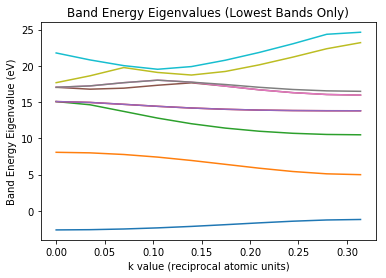

In [113]:
h_bar = 1
m = 1
e = 1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms

ecut = 6 #plane wave cutoff energy (Hartrees)
fcc_conventional_cell_lattice_constant = 10 # (Bohr)
num_kvecs = 10 #number of points to compute bands

#Define lattice vectors
a1 = np.array([0.5, 0.5, 0]) * fcc_conventional_cell_lattice_constant
a2 = np.array([0, 0.5, 0.5]) * fcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0, 0.5]) * fcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol

plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)

#define k-points where bands will be computed
#from gamma to L for fcc crystal
k_vecs = []
for i in range(num_kvecs):
    k_vecs.append(i/(num_kvecs-1)/2 * b1 + i/(num_kvecs-1)/2 * b2 + i/(num_kvecs-1)/2 * b3)
k_vecs = np.array(k_vecs)

#form the potential part of the Hamiltonian
#H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
H_pot = hydrogen_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #hydrogen atom case

#loop over k vecs along gamma to L
eigval_array = []
for k_vec in k_vecs:
    #form the kinetic part of the Hamiltonian here
    H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
    H = H_kin + H_pot
    #compute the eigenvalues here
    eigval_array.append(np.sort(np.linalg.eigvals(H)))
    #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
eigval_array = 27.2* np.array(eigval_array) #eV
fig,ax = plt.subplots()
eig_cut = 10
ax.plot(k_vecs[:,0], eigval_array[:,0:eig_cut])
ax.set_xlabel("k value (reciprocal atomic units)")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.set_title("Band Energy Eigenvalues (Lowest Bands Only)")
fig.savefig("hw5_1_6.pdf")

Now we see many fewer bands in the full band Hydrogen calculation than before (as we have decreased the number of plane waves and thus eigenvalues as we decreased the lattice constant). Additionally, our bands have lost their flat character as the lattice constant is not high enough to neglect interatomic interactions. In terms of the p-like low energy bands however, their enery has gone up significantly (seen above). This is because we have decreased the computational cell size thus decreasing the wavelength of allowed waveforms (to obey boundary conditions). Smaller wavelength implied higher energy. 


## Problem 2 
total energy       =     -15.84352856 Ry (k = 8)

total   stress  (Ry/bohr**3)     (kbar)     P=   19.47

## Problem 3 Part 1
0.005 eV = 0.000367493 Rydbergs. 

k = 1:  total energy              =     -14.54077191 Ry

k = 2:  total energy              =     -15.64725947 Ry

k = 3:  total energy              =     -15.79583185 Ry

k = 4:  total energy              =     -15.82931150 Ry

k = 5: total energy               =     -15.83874327 Ry

k = 6: total energy               =     -15.84192081 Ry

k = 8: total energy               =     -15.84352856 Ry

k = 9: total energy               =     -15.84369735 Ry

k = 10: total energy              =     -15.84379181 Ry

We see that at k = 8, the energy fluctuates from the next k value by less than 0.000367 Ry and thus this is our converged k-mesh point value. 


## Problem 3 Part 2
Now do the same for the pressure. What k-point mesh is required to converge the pressure to within a few kbar? Is this the same energy cutoff required to converge the total energy?
 

k = 1: total stress (Ry/bohr**3) (kbar) P= 468.57

k = 2: total stress (Ry/bohr**3) (kbar) P= 103.83

k = 3: total stress (Ry/bohr**3) (kbar) P= 40.47

k = 4: total stress (Ry/bohr**3) (kbar) P= 26.51

k = 5: total stress (Ry/bohr**3) (kbar) P= 21.75

k = 6: total stress (Ry/bohr**3) (kbar) P= 20.20

Therefore we see a slightly smaller k-mesh needed (6) to reach good convergence for pressure. 

## Problem 3 Part 3

The k-points go reciprocally to the real space computational cell size, therefore if you increase the computational cell size by a factor of 8, then keeping density constant, to achieve the same level of precision we need to decrease the k-mesh by a factor of 8, which amounts to halfing the k points in each of the 3 dimensions in reciprocal space. Therefore if we found k = 8 for convergence above, we now would see k = 4. 

## Problem 3 Part 4

Metallic materials have very closely spaced bands near and above the Fermi surface. Being that the band gaps are small in the conduction band, we need a higher k-point mesh to achieve higher energy resolution in order to resolve the structure of the bands which wouldn't appear to converge in precision for too low of a k-point value.  

## Problem 4 Part 1
With your choice of k-point mesh that converges the total energy to less than $k_bT_{room}$, explore the variation of total energy and stress with the plane wave cutoff energy. Make plots of total energy and stress versus cutoff energy.
k = 8:

| E_cutoff | Total Energy (Ry) | Total Stress (kbars) |
|----------|-------------------|----------------------|
| 4        | -15.53129267      | -106.89              |
| 5        | -15.60560696      | -85.38               |
| 10       | -15.77292042      | -15.98               |
| 12       | -15.80557998 | -5.22 |
| 14       |  -15.82603677|  5.11 | 
| 16       |  -15.8379034|  12.92|
| 18       | -15.84352856      | 19.47                |
| 20       | -15.84650280      | 24.37                |
| 22       | -15.84846668| 27.47|
| 24    | -15.84975960 | 29.37|
| 26 | -15.85048641| 30.38|
| 28 | -15.85088977| 30.76|
| 30       | -15.85118727      | 30.89                |
| 32 |-15.85146026 |30.97 |
| 34 |  -15.85166432 |  31.04|
| 36 | -15.85183156|  31.12|
| 38 | -15.85196803| 31.22|
| 40       | -15.85208502      | 31.36                |


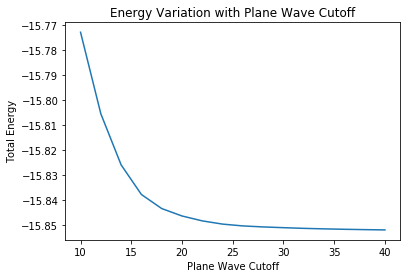

In [74]:
cut_array = np.array([10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
energy_array = np.array([-15.77292042, -15.80557998, -15.82603677, -15.8379034,-15.84352856,  -15.84650280, 
                    -15.84846668,   -15.84975960,  -15.85048641, -15.85088977,  -15.85118727, -15.85146026, 
                         -15.85166432, -15.85183156, -15.85196803, -15.85208502])
pressure_array = np.array([-15.98,-5.22,5.11, 12.92, 19.47,24.37, 27.47, 29.37, 30.38, 
                          30.76, 30.89, 30.97, 31.04, 31.12, 31.22, 31.36])

fig,ax = plt.subplots()
ax.plot(cut_array, energy_array, label = "Total Energy (Ry)")
ax.set_xlabel("Plane Wave Cutoff")
ax.set_ylabel("Total Energy")
ax.set_title("Energy Variation with Plane Wave Cutoff")
fig.savefig("hw5_4_1.pdf")
    

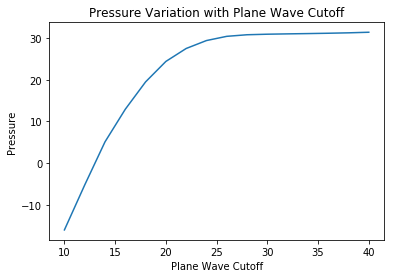

In [75]:
fig,ax = plt.subplots()
ax.plot(cut_array, pressure_array, label = "Pressure (kbars)")
ax.set_xlabel("Plane Wave Cutoff")
ax.set_ylabel("Pressure")
ax.set_title("Pressure Variation with Plane Wave Cutoff")
fig.savefig("hw5_4_2.pdf")

## Problem 4 Part 2
What cutoff energies converge the total energy to within $k_bT_{room}$ and the stress to within a few kbar? Are they the same?


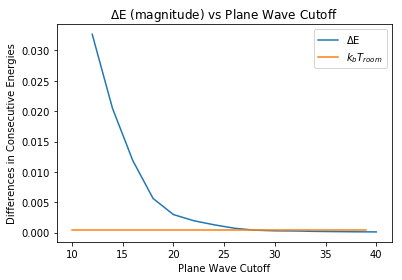

In [80]:
fig,ax = plt.subplots()
ax.plot(cut_array[1:], np.abs(np.ediff1d(energy_array)), label = "$\Delta$E")
ax.set_xlabel("Plane Wave Cutoff")
ax.set_ylabel("Differences in Consecutive Energies")
const = 0.000367
ax.plot(np.arange(10,40), np.ones(30)*const, label = "$k_bT_{room}$" )
ax.legend()
ax.set_title("$\Delta$E (magnitude) vs Plane Wave Cutoff")
fig.savefig("hw5_4_3.pdf")

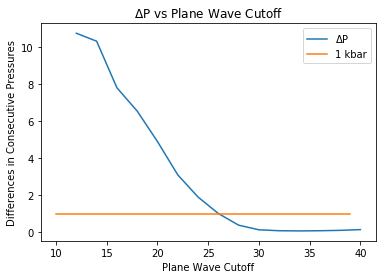

In [79]:
fig,ax = plt.subplots()
ax.plot(cut_array[1:], np.ediff1d(pressure_array), label = "$\Delta$P")
ax.set_xlabel("Plane Wave Cutoff")
ax.set_ylabel("Differences in Consecutive Pressures")
const = 1
ax.plot(np.arange(10, 40), np.ones(30)*const, label = "1 kbar" )
ax.legend()
ax.set_title("$\Delta$P vs Plane Wave Cutoff")
fig.savefig("hw5_4_4.pdf")

We see from the plots above that the cutoff energy needed for total energy convergence is roughly 28 Ry while the cutoff needed for stress convergence is closer to 26 Ry. They are not exactly the same but are relatively close. We will use the more strict convergence of 28 Ry for the calculations to follow. 

## Problem 5 Part 1
The convergence of absolute energies is generally of less practical interest than the conver- gence of the difference between energies, or related quantities. Convergence of the latter to a given precision may occur at lower cutoff energies due to the subtraction of systematic errors.

Decrease the lattice constant by 1% and calculate the total energy as a function of cutoff with the kpoint mesh used for the previous problem. Now plot the difference in energy as a function of cutoff, i.e.
∆E(Ecutoff ) = E(V1, Ecutoff) − E(V2, Ecutoff ) where V1 and V2 are two different volumes.

k = 8, Lattice parameter decreased by 1%: 
        
| E_cutoff | Total Energy (Ry) |
|----------|-------------------|
| 10       |    -15.76945005               |
| 12       |       -15.80184997            |
| 14       |  -15.82281820                 |
| 16       | -15.83493632                   |
| 18       |   -15.84099477                |
| 20       |  -15.84388456                 |
| 22       |   -15.84581631                |
| 24       |   -15.84712616                |
| 26       |  -15.84790186                 |
| 28       |   -15.84832299                |
| 30       |    -15.84862682                |
| 32       |   -15.84889298                |
| 34       |     -15.84911679               |
| 36       |      -15.84928471             |
| 38       |    -15.84942575               |
| 40       |      -15.84953810             |

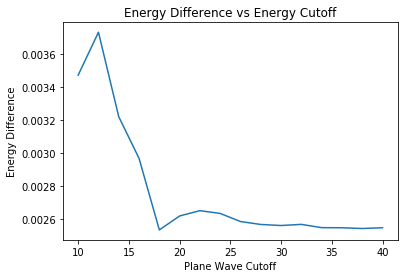

In [81]:
energy2 = [-15.76945005, -15.80184997, -15.82281820
,-15.83493632
 ,-15.84099477
,-15.84388456
,-15.84581631
,-15.84712616
,-15.84790186
,-15.84832299
,-15.84862682
,-15.84889298
,-15.84911679
,-15.84928471
,-15.84942575
,-15.84953810]

difference = -(energy_array - np.array(energy2))

fig,ax = plt.subplots()
ax.plot(cut_array, difference)
ax.set_xlabel("Plane Wave Cutoff")
ax.set_ylabel("Energy Difference")
ax.set_title("Energy Difference vs Energy Cutoff")
fig.savefig("hw5_5_1.pdf")


## Problem 5 Part 2
At what value of cutoff energy is ∆E(Ecutoff) converged? 

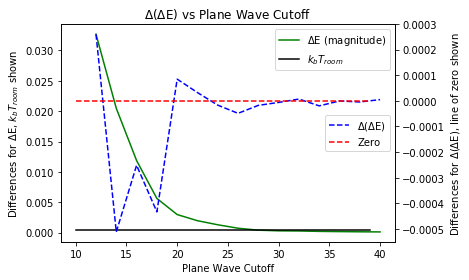

In [137]:
fig,ax = plt.subplots()
ax_new = ax.twinx()
ax_new.plot(cut_array[1:], np.ediff1d(difference), "b--", label = "$\Delta(\Delta$E)")
ax.plot(cut_array[1:], np.abs(np.ediff1d(energy_array)), "g-",  label = "$\Delta$E (magnitude)")
const = 0.000367
ax.plot(np.arange(10,40), np.ones(30)*const, "k-", label = "$k_bT_{room}$" )
ax_new.plot(np.arange(10,40),np.ones(30)*0, "r--", label = "Zero" )
ax.legend()
ax_new.legend(loc = 'center right')
ax.set_xlabel("Plane Wave Cutoff")
ax.set_ylabel("Differences for $\Delta$E, $k_bT_{room}$ shown")
ax_new.set_ylabel("Differences for $\Delta(\Delta$E), line of zero shown")
ax.set_title("$\Delta(\Delta$E) vs Plane Wave Cutoff")
fig.savefig("hw5_5_2.pdf")

We see from the plot above that the plane wave cutoff energy for convergence for the difference in energy is significantly lower (~ 12 Ry (neglecting the small hump around 20 Ry)) than that needed for total energy (~28 Ry). 

## Problem 5 Part 3
The highest spatial frequency components should occur at the boundaries of the computational cells, as the need for the system to maintain boundary conditions between cells may introduce compensational noise. This high frequency noise gets subtracted out in the energy difference calculation, however, which is why the difference converges at a lower energy cutoff than the total energy calculation ( where more modes are needed to resolve the bands from the noise for convergence in precision). 

## Problem 6 Part 1
In this problem, you will calculate the bulk modulus of Si by doing a fit to the total energy curve. To lowest order, the total energy curve around the minimum is,
$E(V)=E(V_0)+ \frac{B}{2V_0}(V −V_0)^2$


Calculate the total energies for a series of lattice constants around the energy min- imum, spaced by approximately 1% increments in lattice constant. Use Excel or another program to do a quadratic fit to your energy curves. Determine V0 and B. The volume of the 8 atom cubic unit cell for the diamond structure is the cube of the lattice parameter in the Espresso input.

We will use a cutoff of 28 for converged total energies from above:

| % change of a| Total Energy (Ry) | Volume ($Angstrom^3$)
|----------|-------------------|
| -4%      |    -15.82900773               | 135.184|
| -3%       |      -15.83755827            | 139.344|
| -2%      |  -15.84393283                 | 143.696|
| -1%    | -15.84832299                   | 148.14|
| 0     |    -15.85088977                | 152.676|
| 1%      |   -15.85178513               | 157.300|
| 2%       |   -15.85116204               | 162.02|
| 3%      |   -15.84918067                | 166.832|
| 4%      |  -15.84594514                | 171.74|

[ 4.09770782e-05 -1.29980101e-02 -1.48215708e+01]


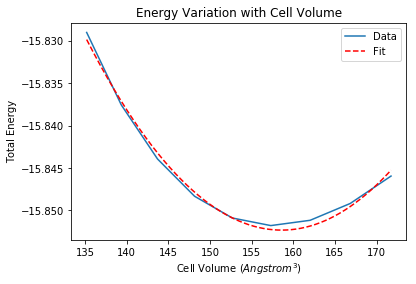

In [95]:
e_array = np.array([-15.82900773,
-15.83755827, 
-15.84393283,
-15.84832299,
-15.85088977,
-15.85178513,
-15.85116204,
-15.84918067,
-15.84594514])
vol_array = np.array([33.769, 34.836, 35.924, 37.035, 38.169, 39.325, 40.505, 41.708, 42.935])

vol_array = np.array([135.184,
139.344,
143.696,
148.14,
152.676,
157.300,
162.02,
166.832,
171.74])

coefs = np.polyfit(vol_array, e_array, 2)
print(coefs)

fig,ax = plt.subplots()
ax.plot(vol_array, e_array, label = "Data")
x = np.linspace(vol_array[0], vol_array[len(vol_array) - 1], 1000)
fit = lambda x: coefs[0] * x**2 + coefs[1] * x + coefs[2]
ax.plot(x, fit(x), "r--",  label = "Fit")
ax.set_xlabel("Cell Volume ($Angstrom^3$)")
ax.set_ylabel("Total Energy")
ax.legend()
ax.set_title("Energy Variation with Cell Volume")
fig.savefig("hw5_6_1.pdf")

From the expansion of the given polynomial, the first order coefficient is -B (therefore B = 1.29980101e-02 Ry/(cubic Angstroms) = 28.334 GPa), and the second order coefficient is $\frac{B}{2V_0}$, therefore we can solve for $V_0 = 158.601 (Angstroms)^3$. 

## Problem 6 Part 2

Above we calculated a $V_0$ value of 158.601 cubic Angstroms, in good agreement with the experimental value. However, we found a bulk modulus of only 28.334 GPa, whereas the experimental value is 100 GPa, in not so good agreement. This shows us that this DFT simulation is very good at simulating for the total energy of the system, however, there are significant limitations in terms of calculating the total stress. The errors leading to this discrepancy could include stopping at the first order expansion for the energy as a function of volume that we assumed above, or the assumption of total energy calculated by quantum espresso going into the calculation of the bulk modulus, which could have biased the result. 

